# Argo in Parquet Format

This notebook shows how to use Argo Parquet files in Julia, via functions provided in the `ArgoData.jl` package (Forget, G., & collaborators).

- Milanese, E., & Nicholson, D. (2025). Sample parquet datasets of Argo program ocean data [Data set]. Zenodo. https://doi.org/10.5281/zenodo.15198578
- https://github.com/boom-lab/argo2parquet-public
- https://github.com/boom-lab/crocolaketools-public
- https://euroargodev.github.io/ArgoData.jl/dev/

## Activate Environment + Packages

- `ArgoData.jl` provides the `Argo_parquet` module
- `Makie.jl` is the plotting library

In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/work/code/git_other/crocolake-julia`


In [2]:
Pkg.status()

Status `~/work/code/git_other/crocolake-julia/Project.toml`
  [9eb831cf] ArgoData v0.2.2
  [13f3f980] CairoMakie v0.13.5
  [124859b0] DataDeps v0.7.13
  [61d90e0f] GeoJSON v0.8.2
  [c27321d9] Glob v1.3.1
  [cb8c808f] MeshArrays v0.3.21
  [bd369af6] Tables v1.12.0


In [3]:
using ArgoData, CairoMakie
import Glob, Tables

## Download Sample Data

_There should be four `.parquet` files in `folder_pq` for this example._

In [4]:
folder_pq=Argo_parquet.sample_download("ARGO_PHY_SAMPLE_QC")

"/var/folders/vn/3r695jqd3177cw09wdmf3z940000gn/T/ARGO_PHY_SAMPLE_QC"

In [5]:
#just in case something went wrong:
isempty(readdir(folder_pq)) ? rmdir(folder_pq) : nothing
folder_pq=Argo_parquet.sample_download("ARGO_PHY_SAMPLE_QC")

"/var/folders/vn/3r695jqd3177cw09wdmf3z940000gn/T/ARGO_PHY_SAMPLE_QC"

In [6]:
files=Glob.glob("*parquet",folder_pq)

4-element Vector{String}:
 "/var/folders/vn/3r695jqd3177cw0" ⋯ 35 bytes ⋯ "C/ARGO_PHY_SAMPLE_QC_00.parquet"
 "/var/folders/vn/3r695jqd3177cw0" ⋯ 35 bytes ⋯ "C/ARGO_PHY_SAMPLE_QC_01.parquet"
 "/var/folders/vn/3r695jqd3177cw0" ⋯ 35 bytes ⋯ "C/ARGO_PHY_SAMPLE_QC_02.parquet"
 "/var/folders/vn/3r695jqd3177cw0" ⋯ 35 bytes ⋯ "C/ARGO_PHY_SAMPLE_QC_03.parquet"

## Open Parquet Folder

This is a lazy operation that reads metadata and open files, rather than loading the whole dataset to memory at once.

In [7]:
da = Argo_parquet.Dataset(folder_pq)

  folder    = /var/folders/vn/3r695jqd3177cw09wdmf3z940000gn/T/ARGO_PHY_SAMPLE_QC 
  files     = 4 
  Dataset   = Parquet2.Dataset(ncolumns=18) 
  schema    = Tables.Schema:
 :DB_NAME                     Union{Missing, String}
 :PLATFORM_NUMBER             Union{Missing, String}
 :DATA_MODE                   Union{Missing, String}
 :LATITUDE                    Union{Missing, Float64}
 :LONGITUDE                   Union{Missing, Float64}
 :JULD                        Union{Missing, Dates.DateTime}
 :PRES                        Union{Missing, Float32}
 :PRES_QC                     Union{Missing, UInt8}
 :PRES_ERROR                  Union{Missing, Float32}
 :TEMP                        Union{Missing, Float32}
 :TEMP_QC                     Union{Missing, UInt8}
 :TEMP_ERROR                  Union{Missing, Float32}
 :PSAL                        Union{Missing, Float32}
 :PSAL_QC                     Union{Missing, UInt8}
 :PSAL_ERROR                  Union{Missing, Float32}
 :ABS_SAL_COMPUTED

## Extract Subsets

- use case 1 : extract region (space and time)
- use case 2 : extract one float data 

In [8]:
IDs  = unique(Tables.getcolumn(da.Dataset, :PLATFORM_NUMBER))

3952-element Vector{Union{Missing, String}}:
 "1901730"
 "1901443"
 "1901445"
 "1901446"
 "1901510"
 "1901517"
 "1901604"
 "1901701"
 "1901711"
 "1901716"
 "1901727"
 "1901728"
 "1901731"
 ⋮
 "4902576"
 "4902577"
 "4902582"
 "4902583"
 "4902584"
 "4902585"
 "4902586"
 "4902587"
 "4902588"
 "4902589"
 "4902595"
 "4902911"

In [9]:
lons=-75 .. -50
lats=25 .. 40
dates=Argo_parquet.DateTime("2001-01-01T00:00:00") .. Argo_parquet.DateTime("2024-12-31T23:59:59")
variables=(:JULD, :LATITUDE, :LONGITUDE, :PRES, :TEMP, :PLATFORM_NUMBER)

df1=Argo_parquet.get_subset_region(da.Dataset,variables=variables)

Row,JULD,LATITUDE,LONGITUDE,PRES,TEMP,PLATFORM_NUMBER
,DateTime?,Float64?,Float64?,Float32?,Float32?,String?
1,2016-09-26T19:22:04.002,26.8679,-50.1386,3.04,27.51,1901730
2,2016-09-26T19:22:04.002,26.8679,-50.1386,7.0,27.459,1901730
3,2016-09-26T19:22:04.002,26.8679,-50.1386,21.96,27.3,1901730
4,2016-09-26T19:22:04.002,26.8679,-50.1386,45.96,27.261,1901730
5,2016-09-26T19:22:04.002,26.8679,-50.1386,56.0,27.253,1901730
6,2016-09-26T19:22:04.002,26.8679,-50.1386,58.0,27.261,1901730
7,2016-09-26T19:22:04.002,26.8679,-50.1386,60.0,27.261,1901730
8,2016-09-26T19:22:04.002,26.8679,-50.1386,62.0,27.261,1901730
9,2016-09-26T19:22:04.002,26.8679,-50.1386,72.04,27.245,1901730


In [10]:
df2=Argo_parquet.get_subset_float(da.Dataset,ID=1901730)

Row,JULD,LATITUDE,LONGITUDE,PRES,TEMP,PLATFORM_NUMBER
,DateTime?,Float64?,Float64?,Float32?,Float32?,String?
1,2014-09-18T22:26:18.002,24.966,-46.8756,1.12,28.375,1901730
2,2014-09-18T22:26:18.002,24.966,-46.8756,3.0,28.387,1901730
3,2014-09-18T22:26:18.002,24.966,-46.8756,7.96,28.391,1901730
4,2014-09-18T22:26:18.002,24.966,-46.8756,9.0,28.393,1901730
5,2014-09-18T22:26:18.002,24.966,-46.8756,12.0,28.407,1901730
6,2014-09-18T22:26:18.002,24.966,-46.8756,16.0,28.409,1901730
7,2014-09-18T22:26:18.002,24.966,-46.8756,22.0,28.423,1901730
8,2014-09-18T22:26:18.002,24.966,-46.8756,30.0,28.417,1901730
9,2014-09-18T22:26:18.002,24.966,-46.8756,36.0,28.393,1901730


## Plotting

In [11]:
import MeshArrays, GeoJSON, DataDeps
fil=MeshArrays.demo.download_polygons("countries.geojson")
pol=MeshArrays.read_polygons(fil)
"polygons for plotting"

"polygons for plotting"

In [12]:
function plot_lo_la_etc(lo,la; te=[], pol=pol)
    fig=Figure()
    ax = Axis(fig[1,1], aspect = AxisAspect(1), backgroundcolor=:transparent)
    co = (isempty(te) ? :blue : te)
    pnts = scatter!(lo,la,color=co,markersize=4)
    if !isempty(te)
        cbar = Colorbar(fig[1,2], pnts, height = Relative(0.75), tickwidth = 2,
            tickalign = 1, width = 14, ticksize = 14)
    end
    #fig[i, j+1] = cbar
    [lines!(ax,l1,color = :black, linewidth = 0.5) for l1 in pol]
    limits!(ax,(-180,180),(-90,90))
    fig
end

plot_lo_la_etc (generic function with 1 method)

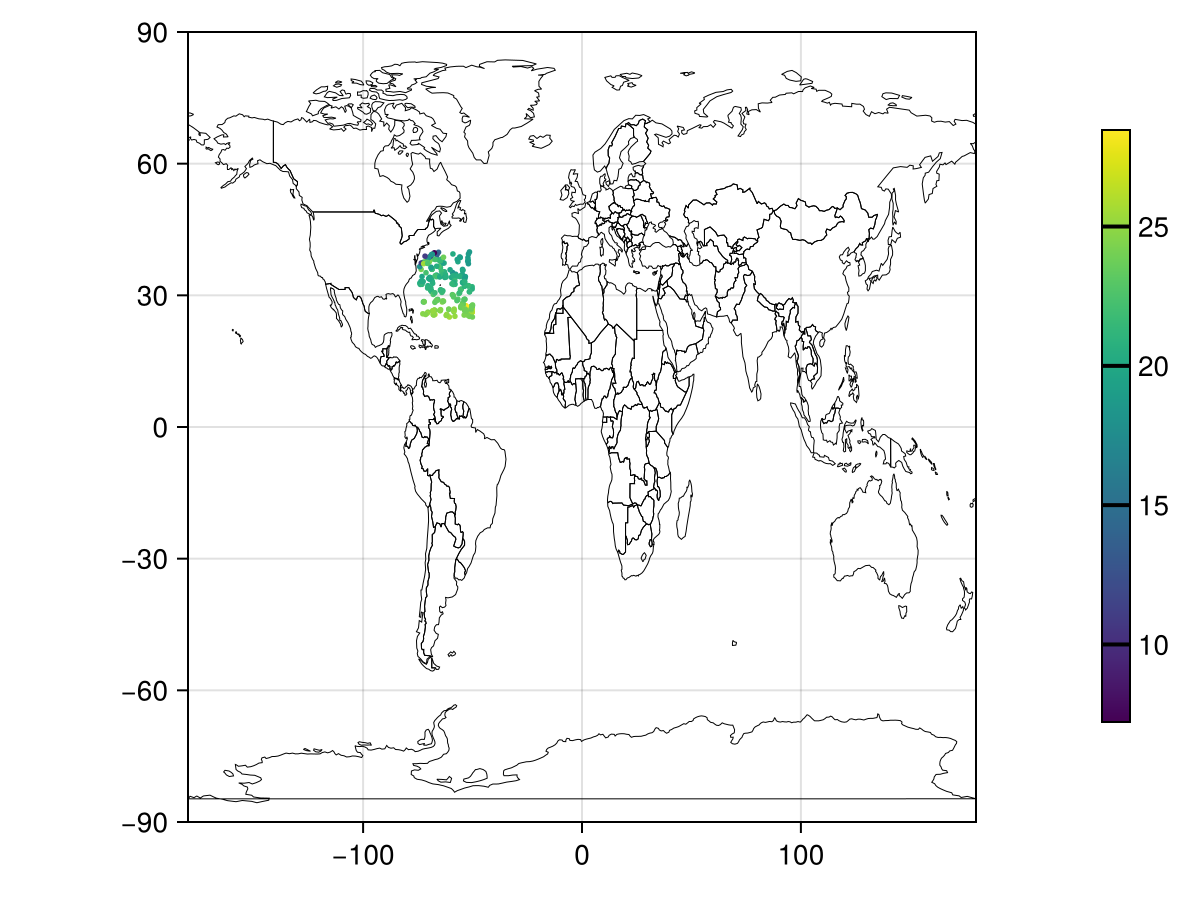

In [13]:
(lo,la,te)=Argo_parquet.get_lon_lat_temp(df1)
fig1=plot_lo_la_etc(lo,la; te=te, pol=pol)

In [14]:
function plot_profiles(df3)
    fig=Figure()
    ax=Axis(fig[1,1])
    gdf3=Argo_parquet.groupby(df3,:JULD)
    [plot_one_profile!(ax,df) for df in gdf3]

    ii=findall( (!ismissing).(df3.PRES))
	scatter!(Axis(fig[2,1]),Argo_parquet.DateTime.(df3.JULD[ii]),-df3.PRES[ii],color=Float64.(df3.TEMP[ii]),markersize=2)

    fig
end

plot_profiles (generic function with 1 method)

In [15]:
function plot_one_profile!(ax,df)
    sort!(df,:PRES)
    np=sum(1 .-ismissing.(df[:,:PRES]))
    df=Argo_parquet.DataFrame(:P=>df[1:np,:PRES],:T=>df[1:np,:TEMP])
    lines!(ax,df.T,-df.P)
end

plot_one_profile! (generic function with 1 method)

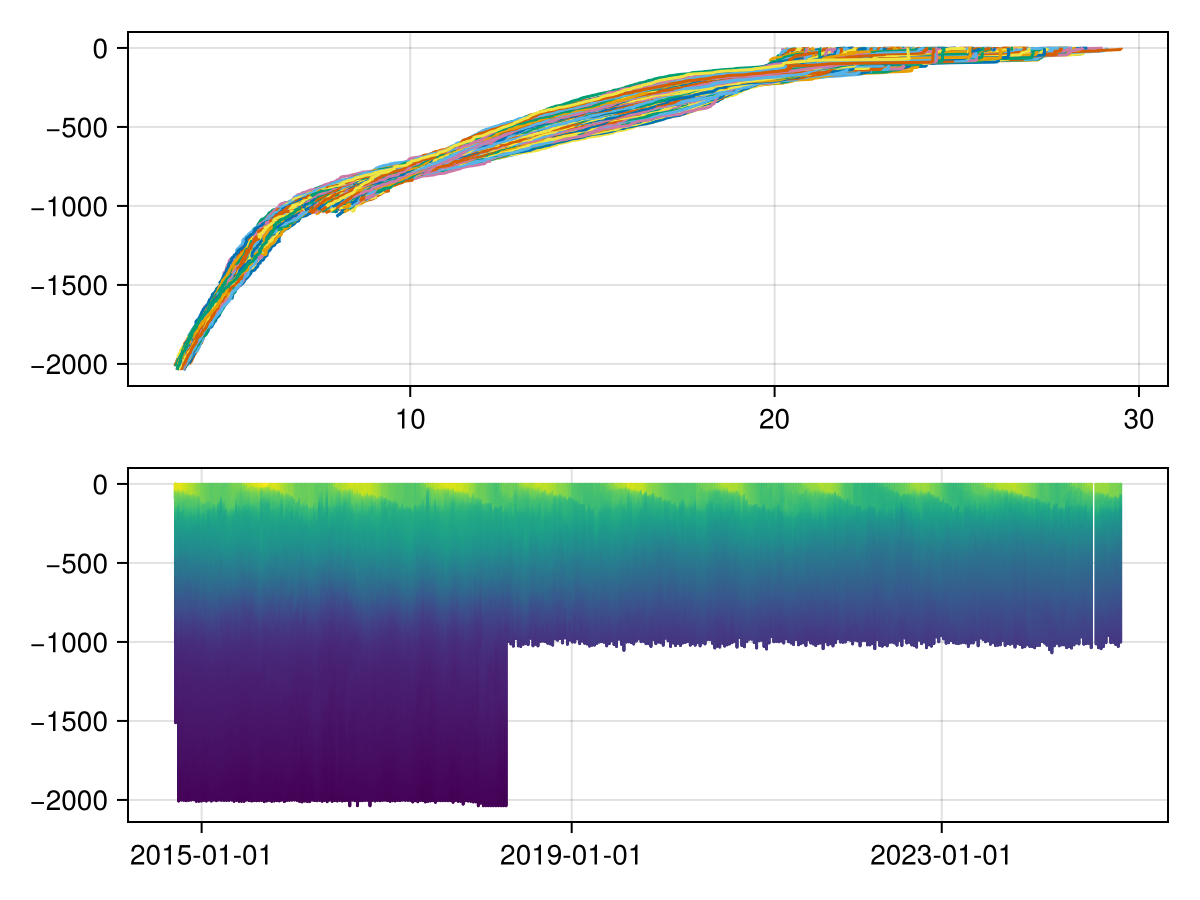

In [16]:
fig2=plot_profiles(df2)